In [ ]:
import sys 
import numpy as np
import pandas as pd
sys.path.append("./") 
sys.path.append("../") 

from src.datasets import Census, BaseIndex, Voters
from src.proxies import ftBisg

from sklearn.model_selection import train_test_split
races_o = ["white", "black", "hispanic", "api", "other"]


In [ ]:
races = ["white", "black", "hispanic", "api"]
v = Voters(path="./data/voters/nc.csv")

train_v, test_v = train_test_split(v.data, test_size=.70)

census = Census(api_key="../../../secrets/api_key.txt", races=races)
ftbisg = ftBisg(races=races, census=census)

all_results = []
for party in v.data.party.unique():
    ftbisg.train(data=train_v, outcome=party, target="party", eta=0.00)

    # masked_test = test_v[test_v["party"] == party]
    masked_test = v.data[v.data["party"] == party]
    masked_test.loc[:,"race"] = masked_test.race.map(lambda x: x if x in races else "other")
    ftbisg_results = ftbisg.inference(data=masked_test)

    all_results.append(ftbisg_results)
ftbisg_df = pd.concat(all_results, axis=0)
ftbisg_df

/Users/letianyu/Documents/Courses/DATA2050/project-bisg/references/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [01:14<00:00, 35.72it/s]
/Users/letianyu/Documents/Courses/DATA2050/project-bisg/references/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [01:15<00:00, 35.02it/s]
/Users/letianyu/Documents/Courses/DATA2050/project-bisg/references/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [01:12<00:00, 36.39it/s]
/Users/letianyu/Documents/Courses/DATA2050/project-bisg/references/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [00:12<00:00, 209.37it/s]


,last,first,party,lic,n_voted,voted_2014_11,voted_2015_11,voted_2016_11,voted_2017_11,voted_2018_11,...,CD,geoid,dem,rep,ind,white,black,hispanic,api,other
0,SMALL,GERALD,dem,True,5,True,False,True,False,True,...,37,37185950400,True,False,False,8.727635e-02,0.912721,4.279297e-08,2.035674e-09,0.000002
1,BURNS,LATOYA,dem,True,0,False,False,False,False,False,...,37,37107010200,True,False,False,6.753470e-02,0.931463,1.062679e-08,1.000564e-03,0.000002
2,MARSH,MARIE,dem,True,5,True,False,True,False,True,...,37,37179020800,True,False,False,2.590413e-01,0.703105,1.179411e-02,1.948807e-03,0.024111
3,DUNCAN,TERRY,dem,False,0,False,False,False,False,False,...,37,37067000500,True,False,False,3.925375e-02,0.918122,1.285380e-07,7.679400e-10,0.042624
4,JACKSON,NATYRA,dem,True,4,False,False,True,False,True,...,37,37175960401,True,False,False,2.505727e-01,0.684913,6.106193e-03,8.437409e-04,0.057564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895522,GALLOP,CHRISTINE,lib,True,0,False,False,False,False,False,...,37,37183053803,False,False,False,4.193254e-01,0.000423,4.063761e-06,3.044850e-07,0.580247
895757,GLASSER,WILLIAM,lib,True,0,False,False,False,False,False,...,37,37057061502,False,False,False,9.996642e-01,0.000002,7.801119e-07,3.868777e-05,0.000294
895817,SAPIKOWSKI,ROBBIN,lib,True,1,False,False,False,False,False,...,37,37183053106,False,False,False,9.998057e-01,0.000003,9.057248e-07,1.319719e-04,0.000059
895868,POPE,JAMIE,lib,True,4,False,False,True,False,True,...,37,37045950601,False,False,False,5.650509e-01,0.335338,7.619162e-03,1.173528e-02,0.080257


# Weighted Estimator

In [5]:
import seaborn as sns 
def weighted_estimator(df, outcome, outcome_value):
    weighted = df.loc[:,races_o].mul(df[outcome] == outcome_value, axis=0).sum()
    return weighted/df.loc[:,races_o].sum()


def bayes_estimator(df, outcome, outcome_value):

    filter = df[df[outcome] == outcome_value]

    filter_mean = filter.loc[:,races_o].mean() 


    acceptance_rate = (df[outcome] == outcome_value).mean() 

    avg_race = df.loc[:,races_o].mean() 


    return (filter_mean * acceptance_rate)/avg_race




rows_ = [] 
real_proportions = ftbisg_df.groupby("race").party.value_counts(normalize=True)
for race, party in real_proportions.index:
    rows_.append({
                "method": "True",
                "race" : race,
                "Proportion": real_proportions[(race,party)],
                "party": party
    })

methods = {"cBISG": ftbisg_df}#, "BISG": bisg, "BIFSG": bifsg, "fBISG": fbisg}
for name, method in methods.items():
    for party in v.data.party.unique():
        weighted_estimate = weighted_estimator(method, outcome="party", outcome_value=party)
        # bayes_estimate = bayes_estimate(method, outcome="party", outcome_value=party)
        for i, x in enumerate(weighted_estimate):
            rows_.append({
                "method": name,
                "race" : weighted_estimate.index[i], 
                "Proportion": x,
                "party": party
            })

rows = pd.DataFrame(rows_)


In [28]:

result_df_1 = rows[rows['method']=='cBISG'].pivot(index='party', columns='race', values='Proportion')
result_df_1[['white', 'black', 'hispanic', 'api', 'other']].applymap(lambda x: round(x, 5))

/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_65500/498216405.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df_1[['white', 'black', 'hispanic', 'api', 'other']].applymap(lambda x: round(x, 5))


race,white,black,hispanic,api,other
party,,,,,
dem,0.19704,0.66989,0.39807,0.52031,0.38538
ind,0.35134,0.27477,0.44939,0.38404,0.41043
lib,0.00632,0.00372,0.01014,0.01111,0.00546
rep,0.44530,0.05162,0.14240,0.08454,0.19873


In [30]:
result_df_2 = rows[rows['method']=='True'].pivot(index='party', columns='race', values='Proportion')
(result_df_1[['white', 'black', 'hispanic', 'api', 'other']] - result_df_2[['white', 'black', 'hispanic', 'api', 'other']]).applymap(lambda x: round(x, 3))

/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_65500/2464782136.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  (result_df_1[['white', 'black', 'hispanic', 'api', 'other']] - result_df_2[['white', 'black', 'hispanic', 'api', 'other']]).applymap(lambda x: round(x, 3))


race,white,black,hispanic,api,other
party,,,,,
dem,-0.016,-0.094,0.033,0.220,0.010
ind,-0.012,0.068,-0.014,-0.147,-0.026
lib,-0.000,0.001,-0.001,0.006,-0.001
rep,0.029,0.025,-0.018,-0.079,0.017


/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_65500/4224423863.py:6: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,
/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_65500/4224423863.py:6: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,
/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_65500/4224423863.py:6: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.stripplot(data= df_party,
/var/folders/d6/b5nz23jd1vb9pn1cgtv0wy640000gn/T/ipykernel_65500/4224423863.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower center", ncol=len(races_o), fancybox=True, shadow=True, bbox_to_anchor=(-.75, -.35))
/var/folders/d

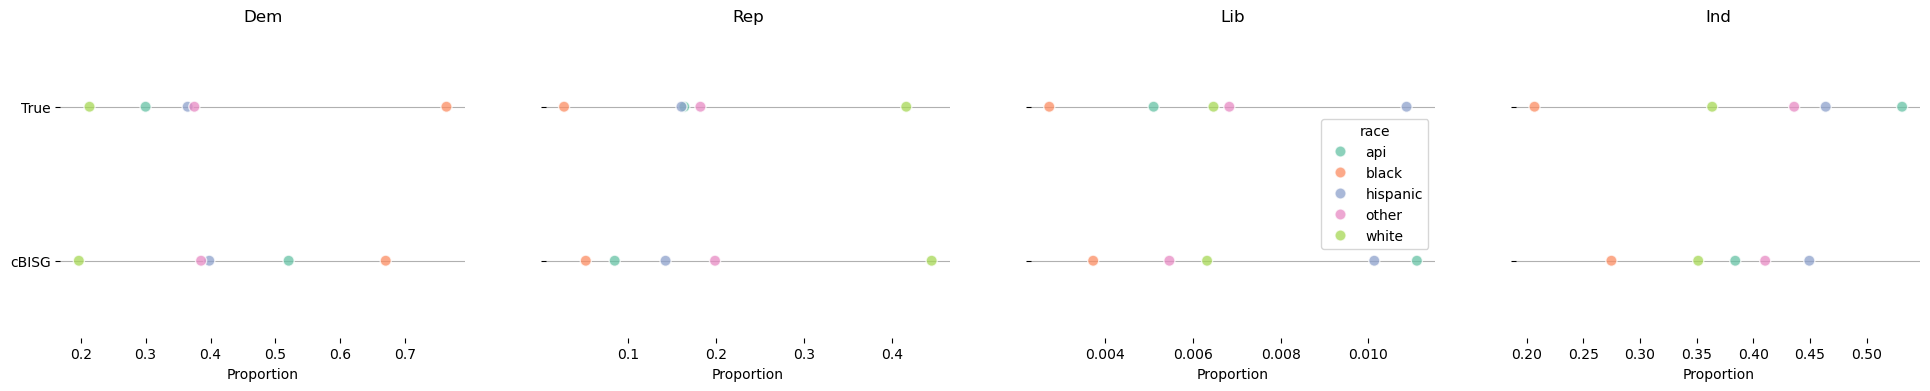

In [10]:
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(1,4, figsize=(24,4))

for i, party in enumerate(["dem", "rep", "lib", "ind"]):
    df_party = rows[rows["party"] == party]
    sns.stripplot(data= df_party, 
                  x="Proportion", 
                  y="method", 
                  hue="race", 
                  ax = axs[i], 
                  palette=sns.color_palette("Set2"), 
                  size=8, 
                  jitter=False, 
                  alpha=0.75,
                  linewidth=1, 
                  edgecolor="w")
    axs[i].set_ylabel("")
    axs[i].xaxis.grid(False)
    axs[i].yaxis.grid(True)
    # axs[i].xaxis.set_major_locator(plt.MaxNLocator(4))
    # for n, label in enumerate(axs[i].xaxis.get_ticklabels()):
    #     label.set_visible(True)

    # ymin, ymax = axs[i].get_ylim()
    # axs[i].set_yticks(np.linspace(ymin, ymax, 4))

    party = party[0].upper() + party[1:]
    axs[i].set_title(party)
    if i != 0:
        axs[i].set_yticklabels([])
    if i == 2:
        plt.legend(loc="lower center", ncol=len(races_o), fancybox=True, shadow=True, bbox_to_anchor=(-.75, -.35))
    else:
        axs[i].get_legend().remove()

sns.despine(left=True, bottom=True)
plt.show()


# Result Evaluation

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.calibration import calibration_curve

def compute_ece(y_true, y_probs, n_bins=10):
    class_names = ['white', 'black', 'hispanic', 'api', 'other']
    true_labels = np.array([class_names.index(label) for label in y_true])

    confidences = np.max(y_probs, axis=1)
    predictions = np.argmax(y_probs, axis=1)
    correct = (predictions == true_labels).astype(float)

    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(confidences, bins) - 1

    ece = 0.0
    for i in range(n_bins):
        mask = (bin_indices == i)
        bin_size = np.sum(mask)
        if bin_size > 0:
            bin_confidence = confidences[mask].mean()
            bin_accuracy = correct[mask].mean()
            ece += np.abs(bin_confidence - bin_accuracy) * (bin_size / len(y_true))

    return ece

In [4]:
# normalize the probabilities
df_results = ftbisg_df[['race', 'white', 'black', 'hispanic', 'api', 'other']].copy()

y_true = df_results['race'].values
y_probs = df_results[['white', 'black', 'hispanic', 'api', 'other']].values
class_names = ['white', 'black', 'hispanic', 'api', 'other']
y_pred = np.array(class_names)[np.argmax(y_probs, axis=1)]

df_results[['race', 'white', 'black', 'hispanic', 'api', 'other']]

,race,white,black,hispanic,api,other
0,black,8.727635e-02,0.912721,4.279297e-08,2.035674e-09,0.000002
1,black,6.753470e-02,0.931463,1.062679e-08,1.000564e-03,0.000002
2,black,2.590413e-01,0.703105,1.179411e-02,1.948807e-03,0.024111
3,black,3.925375e-02,0.918122,1.285380e-07,7.679400e-10,0.042624
4,black,2.505727e-01,0.684913,6.106193e-03,8.437409e-04,0.057564
...,...,...,...,...,...,...
895522,white,4.193254e-01,0.000423,4.063761e-06,3.044850e-07,0.580247
895757,white,9.996642e-01,0.000002,7.801119e-07,3.868777e-05,0.000294
895817,white,9.998057e-01,0.000003,9.057248e-07,1.319719e-04,0.000059
895868,black,5.650509e-01,0.335338,7.619162e-03,1.173528e-02,0.080257


In [5]:
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, labels=class_names, average='macro')
ll = log_loss(y_true, y_probs, labels=class_names)
ece10 = compute_ece(y_true, y_probs, n_bins=10)
cov = np.mean(~np.isnan(y_probs).any(axis=1))

print(f"Accuracy (Acc): {acc:.4f}")
print(f"Macro-F1 (F1): {f1:.4f}")
print(f"Log-loss (LL): {ll:.4f}")
print(f"Expected Calibration Error (ECE10): {ece10:.4f}")
print(f"Coverage (Cov): {cov:.4f}")

Accuracy (Acc): 0.8074
Macro-F1 (F1): 0.5752
Log-loss (LL): 6.6812
Expected Calibration Error (ECE10): 0.0158
Coverage (Cov): 1.0000


# Surname Perturbation

In [7]:
races = ["white", "black", "hispanic", "api"]
ftbisg_dem = ftBisg(races=races, census=census)
ftbisg_rep = ftBisg(races=races, census=census)
ftbisg_ind = ftBisg(races=races, census=census)
ftbisg_lib = ftBisg(races=races, census=census)

ftbisg_dem.train(data=train_v, outcome="dem", target="party")
ftbisg_rep.train(data=train_v, outcome="rep", target="party")
ftbisg_ind.train(data=train_v, outcome="ind", target="party")
ftbisg_lib.train(data=train_v, outcome="lib", target="party")

/Users/letianyu/Documents/Courses/DATA2050/project-bisg/references/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [01:16<00:00, 34.77it/s]
/Users/letianyu/Documents/Courses/DATA2050/project-bisg/references/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [01:14<00:00, 35.84it/s]
/Users/letianyu/Documents/Courses/DATA2050/project-bisg/references/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [01:15<00:00, 35.01it/s]
/Users/letianyu/Documents/Courses/DATA2050/project-bisg/references/proxies/experiments/../src/proxies.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probs_new["other"] = probs.iloc[:,excl_indexes].sum(axis=1, min_count=1)


Beginning Training...


100%|██████████| 2655/2655 [00:12<00:00, 218.54it/s]


In [10]:
def add_noise_to_surnames(df, alpha=0.05, noise_str='xyz', seed=None):
    if seed is not None:
        np.random.seed(seed)

    n_samples = len(df)
    n_perturb = int(alpha * n_samples)
    
    indices_to_perturb = np.random.choice(df.index, size=n_perturb, replace=False)
    df.loc[indices_to_perturb, 'surname'] = df.loc[indices_to_perturb, 'surname'] + noise_str
    return df

In [14]:
# append metrics
acc_list = []
f1_list = []
ll_list = []
ece10_list = []
cov_list = []

for random_seed in range(5):
    data = v.data.copy()
    data = add_noise_to_surnames(data, alpha=0.00, noise_str='xyz', seed=random_seed)
    data.loc[:,"race"] = data.race.map(lambda x: x if x in races else "other")
    data['last'] = data['surname']
    
    masked_test_dem = data[data["party"] == 'dem']
    masked_test_rep = data[data["party"] == 'rep']
    masked_test_ind = data[data["party"] == 'ind']
    masked_test_lib = data[data["party"] == 'lib']

    ftbisg_df_ = pd.concat([
        ftbisg_dem.inference(data=masked_test_dem),
        ftbisg_rep.inference(data=masked_test_rep),
        ftbisg_ind.inference(data=masked_test_ind),
        ftbisg_lib.inference(data=masked_test_lib)
    ], axis=0)

    y_true = ftbisg_df_['race'].values
    y_probs = ftbisg_df_[['white', 'black', 'hispanic', 'api', 'other']].values
    class_names = ['white', 'black', 'hispanic', 'api', 'other']
    y_pred = np.array(class_names)[np.argmax(y_probs, axis=1)]

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, labels=class_names, average='macro')
    ll = log_loss(y_true, y_probs, labels=class_names)
    ece10 = compute_ece(y_true, y_probs, n_bins=10)
    cov = np.mean(~np.isnan(y_probs).any(axis=1))

    acc_list.append(acc)
    f1_list.append(f1)
    ll_list.append(ll)
    ece10_list.append(ece10)
    cov_list.append(cov)

    # print(f"Accuracy (Acc): {acc:.4f}")
    # print(f"Macro-F1 (F1): {f1:.4f}")
    # print(f"Log-loss (LL): {ll:.4f}")
    # print(f"Expected Calibration Error (ECE10): {ece10:.4f}")
    # print(f"Coverage (Cov): {cov:.4f}")

    # display(ftbisg_df_)

print("Acc: ", np.mean(acc_list))
print("F1: ", np.mean(f1_list))
print("LL: ", np.mean(ll_list))
print("ECE: ", np.mean(ece10_list))
print("Cov: ", np.mean(cov_list))

Acc:  0.8073915697405173
F1:  0.5749288905745841
LL:  6.712776150200833
ECE:  0.01573059171729415
Cov:  1.0


In [11]:
# append metrics
acc_list = []
f1_list = []
ll_list = []
ece10_list = []
cov_list = []

for random_seed in range(5):
    data = v.data.copy()
    data = add_noise_to_surnames(data, alpha=0.05, noise_str='xyz', seed=random_seed)
    data.loc[:,"race"] = data.race.map(lambda x: x if x in races else "other")
    data['last'] = data['surname']
    
    masked_test_dem = data[data["party"] == 'dem']
    masked_test_rep = data[data["party"] == 'rep']
    masked_test_ind = data[data["party"] == 'ind']
    masked_test_lib = data[data["party"] == 'lib']

    ftbisg_df_ = pd.concat([
        ftbisg_dem.inference(data=masked_test_dem),
        ftbisg_rep.inference(data=masked_test_rep),
        ftbisg_ind.inference(data=masked_test_ind),
        ftbisg_lib.inference(data=masked_test_lib)
    ], axis=0)

    y_true = ftbisg_df_['race'].values
    y_probs = ftbisg_df_[['white', 'black', 'hispanic', 'api', 'other']].values
    class_names = ['white', 'black', 'hispanic', 'api', 'other']
    y_pred = np.array(class_names)[np.argmax(y_probs, axis=1)]

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, labels=class_names, average='macro')
    ll = log_loss(y_true, y_probs, labels=class_names)
    ece10 = compute_ece(y_true, y_probs, n_bins=10)
    cov = np.mean(~np.isnan(y_probs).any(axis=1))

    acc_list.append(acc)
    f1_list.append(f1)
    ll_list.append(ll)
    ece10_list.append(ece10)
    cov_list.append(cov)

    # print(f"Accuracy (Acc): {acc:.4f}")
    # print(f"Macro-F1 (F1): {f1:.4f}")
    # print(f"Log-loss (LL): {ll:.4f}")
    # print(f"Expected Calibration Error (ECE10): {ece10:.4f}")
    # print(f"Coverage (Cov): {cov:.4f}")

    # display(ftbisg_df_)

print("Acc: ", np.mean(acc_list))
print("F1: ", np.mean(f1_list))
print("LL: ", np.mean(ll_list))
print("ECE: ", np.mean(ece10_list))
print("Cov: ", np.mean(cov_list))

Acc:  0.8050008425126294
F1:  0.5635375723976812
LL:  6.688034697505105
ECE:  0.014817882466359539
Cov:  1.0


In [12]:
# append metrics
acc_list = []
f1_list = []
ll_list = []
ece10_list = []
cov_list = []

for random_seed in range(5):
    data = v.data.copy()
    data = add_noise_to_surnames(data, alpha=0.10, noise_str='xyz', seed=random_seed)
    data.loc[:,"race"] = data.race.map(lambda x: x if x in races else "other")
    data['last'] = data['surname']
    
    masked_test_dem = data[data["party"] == 'dem']
    masked_test_rep = data[data["party"] == 'rep']
    masked_test_ind = data[data["party"] == 'ind']
    masked_test_lib = data[data["party"] == 'lib']

    ftbisg_df_ = pd.concat([
        ftbisg_dem.inference(data=masked_test_dem),
        ftbisg_rep.inference(data=masked_test_rep),
        ftbisg_ind.inference(data=masked_test_ind),
        ftbisg_lib.inference(data=masked_test_lib)
    ], axis=0)

    y_true = ftbisg_df_['race'].values
    y_probs = ftbisg_df_[['white', 'black', 'hispanic', 'api', 'other']].values
    class_names = ['white', 'black', 'hispanic', 'api', 'other']
    y_pred = np.array(class_names)[np.argmax(y_probs, axis=1)]

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, labels=class_names, average='macro')
    ll = log_loss(y_true, y_probs, labels=class_names)
    ece10 = compute_ece(y_true, y_probs, n_bins=10)
    cov = np.mean(~np.isnan(y_probs).any(axis=1))

    acc_list.append(acc)
    f1_list.append(f1)
    ll_list.append(ll)
    ece10_list.append(ece10)
    cov_list.append(cov)

    # print(f"Accuracy (Acc): {acc:.4f}")
    # print(f"Macro-F1 (F1): {f1:.4f}")
    # print(f"Log-loss (LL): {ll:.4f}")
    # print(f"Expected Calibration Error (ECE10): {ece10:.4f}")
    # print(f"Coverage (Cov): {cov:.4f}")

    # display(ftbisg_df_)

# keep only 4 digits of the mean
print(f"Acc: {np.mean(acc_list):.4f}")
print(f"F1: {np.mean(f1_list):.4f}")
print(f"LL: {np.mean(ll_list):.4f}")
print(f"ECE: {np.mean(ece10_list):.4f}")
print(f"Cov: {np.mean(cov_list):.4f}")

Acc: 0.8027
F1: 0.5523
LL: 6.6640
ECE: 0.0140
Cov: 1.0000


In [13]:
# append metrics
acc_list = []
f1_list = []
ll_list = []
ece10_list = []
cov_list = []

for random_seed in range(5):
    data = v.data.copy()
    data = add_noise_to_surnames(data, alpha=0.20, noise_str='xyz', seed=random_seed)
    data.loc[:,"race"] = data.race.map(lambda x: x if x in races else "other")
    data['last'] = data['surname']
    
    masked_test_dem = data[data["party"] == 'dem']
    masked_test_rep = data[data["party"] == 'rep']
    masked_test_ind = data[data["party"] == 'ind']
    masked_test_lib = data[data["party"] == 'lib']

    ftbisg_df_ = pd.concat([
        ftbisg_dem.inference(data=masked_test_dem),
        ftbisg_rep.inference(data=masked_test_rep),
        ftbisg_ind.inference(data=masked_test_ind),
        ftbisg_lib.inference(data=masked_test_lib)
    ], axis=0)

    y_true = ftbisg_df_['race'].values
    y_probs = ftbisg_df_[['white', 'black', 'hispanic', 'api', 'other']].values
    class_names = ['white', 'black', 'hispanic', 'api', 'other']
    y_pred = np.array(class_names)[np.argmax(y_probs, axis=1)]

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, labels=class_names, average='macro')
    ll = log_loss(y_true, y_probs, labels=class_names)
    ece10 = compute_ece(y_true, y_probs, n_bins=10)
    cov = np.mean(~np.isnan(y_probs).any(axis=1))

    acc_list.append(acc)
    f1_list.append(f1)
    ll_list.append(ll)
    ece10_list.append(ece10)
    cov_list.append(cov)

    # print(f"Accuracy (Acc): {acc:.4f}")
    # print(f"Macro-F1 (F1): {f1:.4f}")
    # print(f"Log-loss (LL): {ll:.4f}")
    # print(f"Expected Calibration Error (ECE10): {ece10:.4f}")
    # print(f"Coverage (Cov): {cov:.4f}")

    # display(ftbisg_df_)

print(f"Acc: {np.mean(acc_list):.4f}")
print(f"F1: {np.mean(f1_list):.4f}")
print(f"LL: {np.mean(ll_list):.4f}")
print(f"ECE: {np.mean(ece10_list):.4f}")
print(f"Cov: {np.mean(cov_list):.4f}")

Acc: 0.7979
F1: 0.5285
LL: 6.6151
ECE: 0.0123
Cov: 1.0000
